# Lets use our KNN Algorithm !

First thing we should do is recive our data set

In [5]:
import pandas as pd

df = pd.read_csv("data/data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cleaned_df = df.drop("Unnamed: 32", axis=1)

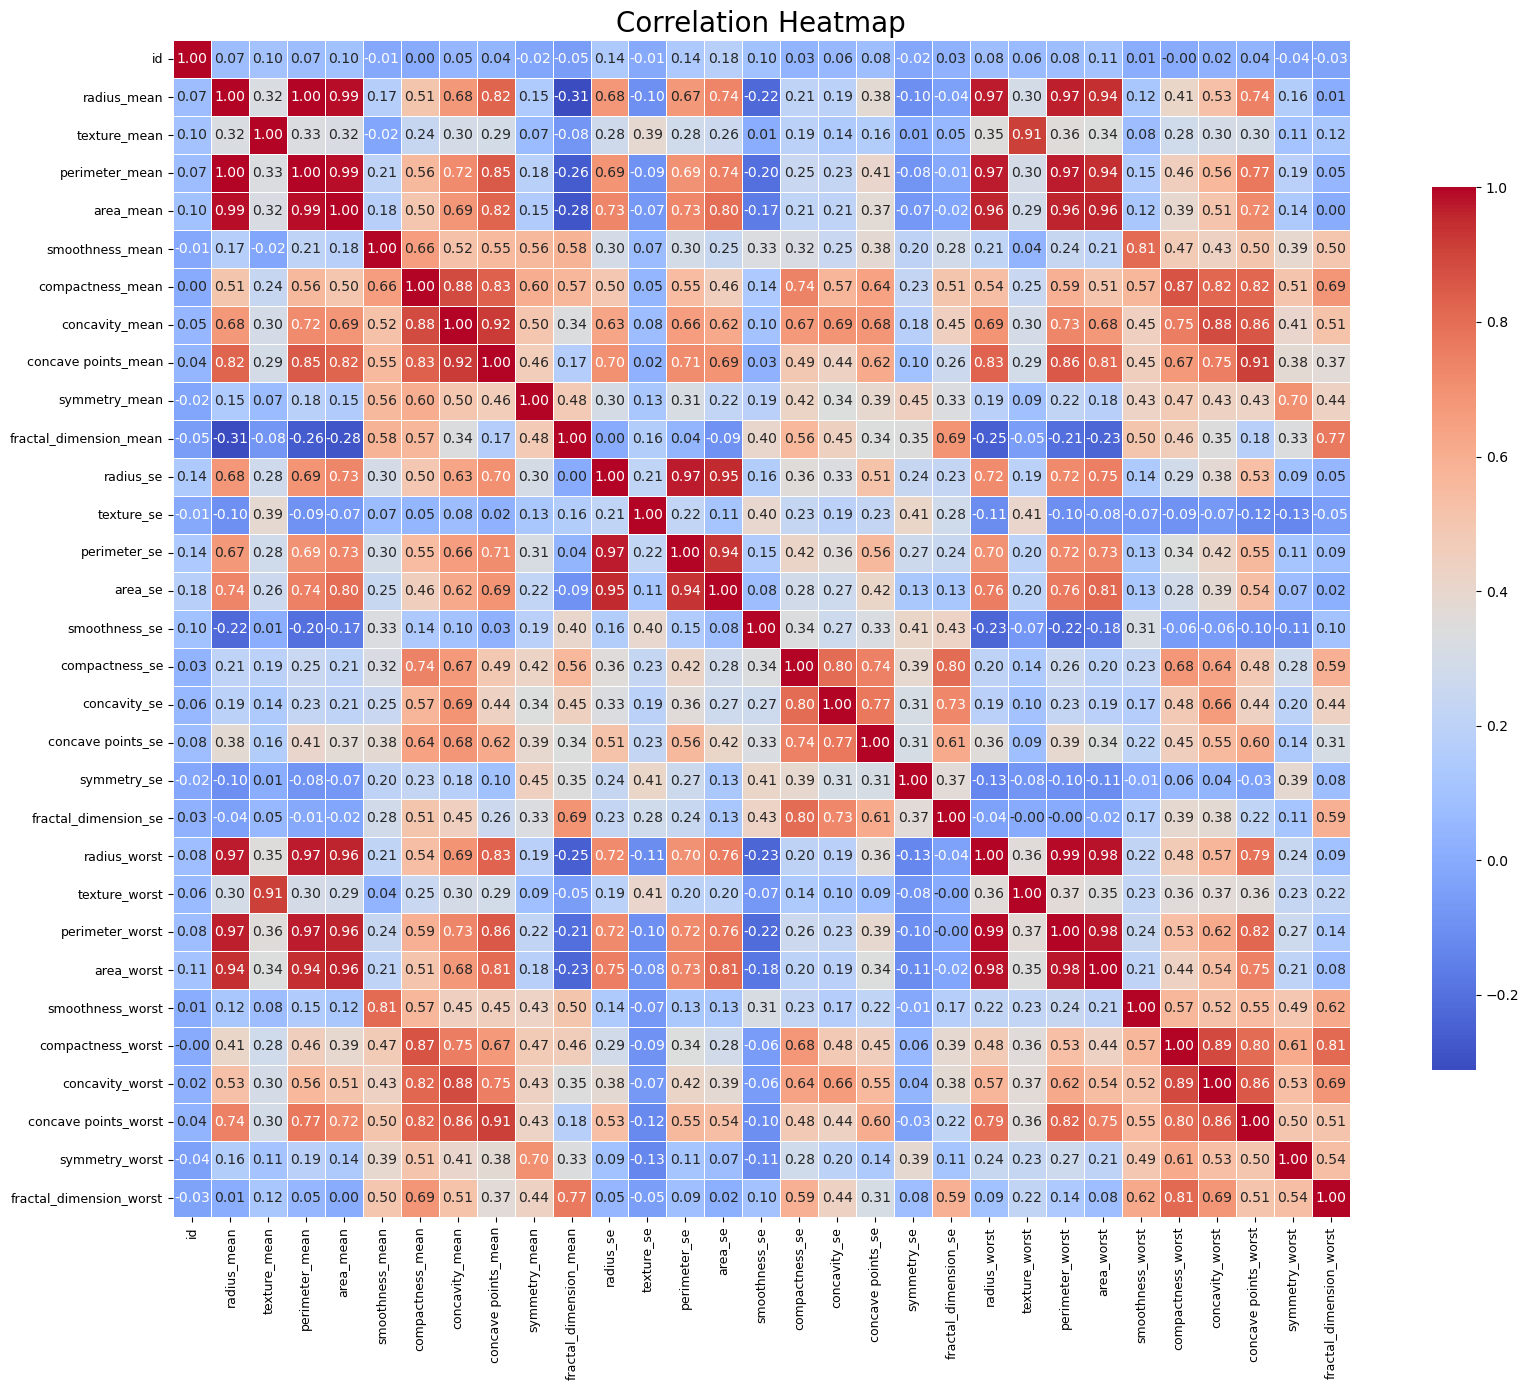

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = cleaned_df.corr(numeric_only=True) # This will get the correlations of 

plt.figure(figsize=(18, 14))  
sns.heatmap(
    corr, 
    cmap="coolwarm", 
    annot=True,         
    fmt=".2f",          
    square=True,
    cbar_kws={"shrink": 0.75},
    linewidths=.5
)

plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

Now that we see the correlations lets try to predict outputs given input data

### First lets split our data into testing and training data

In [ ]:
# we will use 90 Percent for our Training data
percent = 0.8
numTrainingRows = int((len(cleaned_df) * percent))
trainingData = cleaned_df.iloc[:numTrainingRows]
trainingData

#our test data will be the other 20%

testingData = cleaned_df.iloc[numTrainingRows:]



In [60]:
testingData = cleaned_df.iloc[numTrainingRows:]
testingData

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
455,9112085,B,13.380,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
456,9112366,B,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,...,13.120,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220
457,9112367,B,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.340,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,927241,M,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [61]:

target = trainingData['diagnosis']
inputs = trainingData.drop(["diagnosis","id"], axis=1)
testingDatainputs = testingData.drop(["diagnosis","id"], axis=1)
true_outputs = testingData['diagnosis']

points = inputs.values.tolist()        
values = target.values.tolist()   
predictionPoints = testingDatainputs.values.tolist()


In [62]:
from Chapter2Algos import KNN

predictions = KNN(points, values, predictionPoints, 5)


In [63]:
trueCheck = true_outputs.values.tolist()

def checkRates(predictions:list, trueValues:list) -> str:

    correctPrediction = 0
    incorrectPredictions = 0

    for i in range(len(predictions)):
        if predictions[i] == trueCheck[i]:
            correctPrediction += 1
        else:
            incorrectPredictions += 1

    return "Correct Prediction Rate: " + str((correctPrediction)/len(predictions))

checkRates(predictions, trueCheck)


'Correct Prediction Rate: 0.9385964912280702'

## lets see the diffrent accuracies we get using diffrent amounts of neighbors

In [64]:
predictions5 = KNN(points, values, predictionPoints, 5)
predictions10 = KNN(points, values, predictionPoints, 10)
predictions25 = KNN(points, values, predictionPoints, 25)
predictions50 = KNN(points, values, predictionPoints, 50)
predictions100 = KNN(points, values, predictionPoints, 100)
predictions200 = KNN(points, values, predictionPoints, 300)

print("5 Neighbors " + checkRates(predictions5,trueCheck))
print("10 Neighbors " + checkRates(predictions10,trueCheck))
print("25 Neighbors " + checkRates(predictions25,trueCheck))
print("50 Neighbors " + checkRates(predictions50,trueCheck))
print("100 Neighbors " + checkRates(predictions100,trueCheck))
print("300 Neighbors " + checkRates(predictions200,trueCheck))

5 Neighbors Correct Prediction Rate: 0.9385964912280702
10 Neighbors Correct Prediction Rate: 0.9473684210526315
25 Neighbors Correct Prediction Rate: 0.9385964912280702
50 Neighbors Correct Prediction Rate: 0.956140350877193
100 Neighbors Correct Prediction Rate: 0.9473684210526315
300 Neighbors Correct Prediction Rate: 0.9122807017543859


# for this our most optimal NN value is 25